# Introduction

Over the years, I have had the opportunity to encounter multiple failed attempts at queer romance. These romantic encounters vary from ex-boyfriends in long-distance relationships, delusionships i.e. having an requited crush on someone, and the person lives in my head rent-free, situationships i.e. either my romantic partner or I (the "or" is inclusive) want the fun of a relationship but denies the responsibilities of the actual label, and the list goes on. I believed that it was a completely normal and healthy behavior to give each of these love interests a one to two-hour long Spotify playlist that is purely dedicated to my feelings for them and our experiences between each other. 

While the class of love interest I have varies in its categories and thrives in diversity, due to time and mental constraints, I wish to explore a machine learning model that can classify whether a track is about my latest situationship, whose arbitrary name is James. The choice for this arbitrary name is due to the fact that this love interest is British. My exploratory challenge is as follows:

"Can a logistic regression model classify whether this song is about James?"

This report explores the classification model using audio features and metadata of the Spotify tracks as predictors in order to produce a classification. The report justifies the choice of predictors and processes the data before training the model. After model training, the model evaluates the trained model based on model performance metrics, including precision, accuracy, recall and F-1 score, before finding the potential best parameters for the model.

# Data Collection & Processing

The report extracts data for analysis using Spotify's Web API. On Python 3.8, we complete the task using the `spotipy` library, which is the lightweight version of Spotify's Web API. This helps us extract relevant metadata and audio features of Spotify. We use the API using the `oauth2.SpotifyOAuth` from the `spotipy` library, which allows us to key in our authentication details to extract data. The authentication detials include `client_id`, `client_secret`, and `redirect_uri`, which, in this report, is indicated as http://localhost/ as the web application is only in testing and for personal use. One can use the `pip install spotipy` command in the Terminal to install the library for Spotify API.

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

# Replace 'your_client_id', 'your_client_secret', and 'your_redirect_uri' with your information
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id='c435380ab4554991a681faa092bee4c2',
                                               client_secret='eb165c57dca940588f4e2600fd2bbd70',
                                               redirect_uri='http://localhost/',
                                               scope="user-library-read playlist-read-private"))

After authenticating the API for fetch our data, we check all the possible playlist names in my Spotify account using the code below.

In [2]:
def fetch_all_user_playlists():
    """
    Fetches all playlists for the current user, handling pagination.
    """
    playlists = []
    results = sp.current_user_playlists(limit=50)
    while results:
        playlists.extend(results['items'])
        if results['next']:
            results = sp.next(results)
        else:
            results = None
    return playlists

# Fetch all playlists and print their names and IDs
all_playlists = fetch_all_user_playlists()
for playlist in all_playlists:
    print(playlist['name'], playlist['id'])


brooklyn baby 5lg9p4LcYxVPfwYoiQkO69
econometrics 4AoM0nxjHNh9qUW9mxvU7q
J.24.02 6e6VAZ0a5nHi0WeNhs8tIW
/ / warren 3SyKKGHsHBHyvZgbWys0eY
music that can be put in study kit reels 5Cc2pcnhors8740OFjvBG3
where there is a flame (someone's bound to get burned) 4N8hquzdJI4gHzktT5FSR1
Engineer From TF2's Educated Pussy Music 0gPGX3TKA3Im6c36xdk658
My V Pop 1XQTZUU9Q0zFufe1uhA4A5
heaven regulars 2POTTwq9PfgKFTbP7V0RN4
you taste minty /t 28a8TfWPR0K4im85MHppuT
by the grace of this gun i found go we | tf2 1wyLaQaqBxkizawea65yRO
SCIENCE PARTY TF2!! 0PNUooLg1id15wa2dDXfFA
medic // tf2 6sXdm8WGuZqgyDpQli61xD
birds of a feather kill together  4GzOe8PlghtI1r53g97udS
heavymedic || TF2 7oxMGWQbTGKOpEpsKiE9xn
J.24.01 📈 3h8Xerp8rlSGNWfNOKfLjp
the very idea of love 5zShBuodn61WJsc3mjiU2B
do not go far from me  0yP5ydZFCUnPOvjqaDgXET
do not go far from me. 3V90yLRv7I8OEH6UVBmE7c
Sad Classical 37i9dQZF1DXbm0dp7JzNeL
modern classical and other gems 4D9eUOquLMbNYGieCn0hgg
despite, despite, despite 0szGWq5AE

From this playlist, we filter out the following 10 playlists that are relevant for this analysis. All these data and the curated playlists are based on my personal feelings with the love interests and do not reveal any personal information about the love interests themselves. Additionally, interpretations of the songs chosen in these playlists are arbitrary and do not personally attack their identities or defame them. All the names categorized in this data frame are arbitrary names and do not reflect their actual names or aspects of their identity. We choose to manually filter these playlists as their subject of interest are subjective to the playlist curator (me). The 10 playlists are 

* _for pete_, dedicated to Peter
* _Isaac + radmaninoff_, dedicated to Isaac
* _catherine of aragon type beat_, dedicated to Jan
* _u were my san francisco_, dedicated to Amos 
* _what have we done for the past 3 years_, dedicated to Hai 
* _cột cờ hà nội_, dedicated to Dat
* _tears from your hazelnut eyes_, dedicated to Stenio
* _suéltame, lentamente_, dedicated to Lare
* _you taste minty_, dedicated to James (variable of interest), and
* _brooklyn baby_, dedicated to Van

In [3]:
## playlists to be filtered out, all these names are arbitrary and do not refer to specific people
## 1. for pete 2K3Ns44I6lYV4X5zgUHM5u (Peter)
## 2. Isaac + radmaninoff 37i9dQZF1EJyUZHlkdWp8z (Isaac)
## 3. catherine of aragon type beat 2T3MPMlB0HEwjhvP9xnUFI (Jan)
## 4. u were my san francisco /t 1rNcqvwif0kcvxzgX0qoi3 (Amos)
## 5. what have we done for the past 3 years /t 0JUm7dc0bK6HbwgkdAIhlR (Hai)
## 6. cột cờ hà nội /t 5dyJpvrowSKkR8ROukQedV (Dat)
## 7. tears from your hazelnut eyes /t 7wh2JLHYtKOtlCxmNHgXK0 (Stenio)
## 8. suéltame, lentamente. 2jLnaLhF7CoCqQvEuOps8Y (Lare)
## 9. you taste minty /t 28a8TfWPR0K4im85MHppuT (James)
## 10. brooklyn baby 5lg9p4LcYxVPfwYoiQkO69 (Van)

def get_playlist_tracks(playlist_id):
    '''
    Extracting the tracks of a playlist using Spotify playlist ID
    '''
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

# Example usage
james = '28a8TfWPR0K4im85MHppuT'  # Replace with an actual playlist ID
tracks = get_playlist_tracks(james)
for track in tracks:
    print(track['track']['name'], track['track']['id'])

...Ready For It? 2yLa0QULdQr0qAIvVwN6B5
Honey 0GMZYC6lcrpnwjDiEtDO8i
Fetch The Bolt Cutters 4SdubskbLiOkpsIjRVVsya
Sugar 6ZdAsADC9LIICvsVRuGWbZ
Kollage 6vX00oaG3bMuNBKxapoPYO
Flim 3JJ4BoL9WVHk4Yye2EGJC7
You Taste Like Toothpaste 1sz9Mng4JgQkmUUqmJQ4Dc
Call Me 3XCp5o1FUpAH0aj2Hmj5yz
august 3hUxzQpSfdDqwM3ZTFQY0K
illicit affairs 2NmsngXHeC1GQ9wWrzhOMf
Wildest Dreams (Taylor's Version) 1K39ty6o1sHwwlZwO6a7wK
this is how you fall in love 1aEsTgCsv8nOjEgyEoRCpS
I Really Like You 2hHLbkatPwOOmrNxTiD41L
All That 1NMLRno3oPdnISJjwg1njP
29 #Strafford APTS 5qngJJcuGPqUyX3VPKvH11
Come Back...Be Here (Taylor's Version) 4pNApnaUWAL2J4KO2eqokq
willow 0lx2cLdOt3piJbcaXIV74f
Supercut 6K8VQ84MqhsoakN5MjrnVR
Wonderland (Taylor's Version) 2ve0kuaWUCt4Zx8x4bf1MR
let them know they're on your mind 5lhBGOeNrfMPDpPFDJcvSl
About You 1fDFHXcykq4iw8Gg7s5hG9
TALK ME DOWN 1othhMi2WsiF9oLoisJjYW
Snow On The Beach (feat. More Lana Del Rey) 4zmKGsrXjLmljb5fTaBTot
Backseat (feat. Carly Rae Jepsen) 4HjtHraeKy5wA4DA9o9

## Choice of predictors with Spotify API

Using Spotify's API with metadata and audio features, the predictors I chose for this assignment include the artist title, genre, danceabiltiy, valence, and loudness. In detail, the predictors are defined and measured as follows:

- **artist title** (nominal categorical): the stage name of the artist that performs/is accredited on the Spotify track. Some values that the variable can take include Ariana Grande, Taylor Swift, Troye Sivan, Clairo, etc.. 
- **genre** (nominal categorical): the genre of the track, based on a classification of the artist. When the artist is classified by multiple genres, the genre is categorized by the first genre of the array. 
- **danceability** (quantitative continuous, taking values from 0.00-1.00): how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity (Spotify, n.d.). A value of 1.00 means the track is very danceable, whereas a value of 0.00 indicates that the track is not danceable. The report picked this variable due to my personal preference to dance to in my own time.
- **loudness** (quantitative continuous, taking values from -60.000 to 0.000): the loudness of a track measured in decibels (dB) (Spotify, n.d.).
- **valence** (quantitative continuous, taking values from 0.00 to 1.00): the overall positivity of the track, with 1.00 indicating a very positive track. I choose this value because moods are essential when its comes to curating these playlists i.e. tracks that make me cry are typically chosen (Spotify, n.d.).

From these predictors, we formulate the following `pandas` dataframe.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

playlists_info = [
    {"title": "for pete", "id": "2K3Ns44I6lYV4X5zgUHM5u", "name": "Peter"},
    {"title": "Isaac + radmaninoff", "id": "37i9dQZF1EJyUZHlkdWp8z", "name": "Isaac"},
    {"title": "catherine of aragon type beat", "id": "2T3MPMlB0HEwjhvP9xnUFI", "name": "Jan"},
    {"title": "u were my san francisco", "id": "1rNcqvwif0kcvxzgX0qoi3", "name": "Amos"},
    {"title": "what have we done for the past 3 years", "id": "0JUm7dc0bK6HbwgkdAIhlR", "name": "Hai"},
    {"title": "cột cờ hà nội", "id": "5dyJpvrowSKkR8ROukQedV", "name": "Dat"},
    {"title": "tears from your hazelnut eyes", "id": "7wh2JLHYtKOtlCxmNHgXK0", "name": "Stenio"},
    {"title": "suéltame, lentamente.", "id": "2jLnaLhF7CoCqQvEuOps8Y", "name": "Lare"},
    {"title": "you taste minty", "id": "28a8TfWPR0K4im85MHppuT", "name": "James"},
    {"title": "brooklyn baby", "id": "5lg9p4LcYxVPfwYoiQkO69", "name": "Van"}
]

def get_playlist_tracks_with_info(playlist_id, playlist_title, custom_name=None):
    tracks_with_info = []
    results = sp.playlist_tracks(playlist_id)
    track_ids = []
    artist_ids = set()
    while results:
        for item in results['items']:
            if item.get('track'):  # Ensuring there's a track object
                track_ids.append(item['track']['id'])
                artist_ids.add(item['track']['artists'][0]['id'])
        
        if results['next']:
            results = sp.next(results)
        else:
            results = None
    
    # Fetch audio features for all collected track IDs
    audio_features = sp.audio_features(track_ids) if track_ids else []
    
    # Fetch artist genres and store only the first genre
    artist_genres = {}
    for artist_id in artist_ids:
        artist_info = sp.artist(artist_id)
        artist_genres[artist_id] = artist_info['genres'][0] if artist_info['genres'] else None
    
    # Merge information
    if track_ids:
        for idx, item in enumerate(sp.playlist_tracks(playlist_id)['items']):
            track = item['track']
            artist_id = track['artists'][0]['id']
            track_info = {
                'playlist title': playlist_title,
                'love interest': custom_name,
                'track name': track['name'],
                'track id': track_ids[idx],
                'artist': track['artists'][0]['name'],
                'release year': track['album']['release_date'][:4],  # Assuming YYYY-MM-DD format
                'genre': artist_genres[artist_id],
                'danceability': audio_features[idx]['danceability'] if idx < len(audio_features) else None,
                'loudness': audio_features[idx]['loudness'] if idx < len(audio_features) else None,
                'valence': audio_features[idx]['valence'] if idx < len(audio_features) else None
            }
            tracks_with_info.append(track_info)
            
    return tracks_with_info

# Now running the modified function
all_tracks = []
for playlist in playlists_info:
    tracks = get_playlist_tracks_with_info(playlist['id'], playlist['title'], playlist.get('name'))
    all_tracks.extend(tracks)

# Convert to DataFrame
df = pd.DataFrame(all_tracks)

# Display the DataFrame to ensure it looks correct
df

,playlist title,love interest,track name,track id,artist,release year,genre,danceability,loudness,valence
0,for pete,Peter,pete davidson,0XOnMqLQDO89iAg7dWWwnG,Ariana Grande,2018,pop,0.652,-10.212,0.304
1,for pete,Peter,Blank Space,1u8c2t2Cy7UBoG4ArRcF5g,Taylor Swift,2014,pop,0.760,-5.412,0.570
2,for pete,Peter,Best Friend,47Bg6IrMed1GPbxRgwH2aC,Rex Orange County,2017,bedroom pop,0.575,-5.247,0.320
3,for pete,Peter,I Really Like You,0PGLRTN0X6DrXh645WJCIY,Carly Rae Jepsen,2015,canadian pop,0.622,-4.701,0.599
4,for pete,Peter,Would You Be So Kind,3ZiuxcBeRanTjfHzVBuuQe,dodie,2017,alt z,0.662,-9.621,0.614
...,...,...,...,...,...,...,...,...,...,...
202,brooklyn baby,Van,Touch,1l4pW7Tklvcc3k38rDFMkk,Cigarettes After Sex,2019,ambient pop,0.483,-9.403,0.368
203,brooklyn baby,Van,ivy,19CSr8rwW05VJL2F91KFNK,Taylor Swift,2020,pop,0.515,-9.277,0.535
204,brooklyn baby,Van,So Right,1SX0ymMOeU0JpYdTfiGTIS,Carly Rae Jepsen,2023,canadian pop,0.718,-5.393,0.886
205,brooklyn baby,Van,What's The Time Where You Are?,0sYM4OmgrRYaHq6DV7obq1,Troye Sivan,2023,australian pop,0.717,-6.781,0.301


## Data processing

### Deleting duplicates

During the curation of these playlists, I notice that a lot of tracks are repeated throughout the playlists, as their messages correspond to multiple stories and interactions with my love interests. While recycling is typically commendable, this can pose problems for our machine learning model. Duplicates can introduce a certain level of complexity and ambiguity that may affect the model's performance and interpretation. For tracks that are present in both the playlists about James and not about James, with one in the training set and one in the test set, the model may make a false classification, and there is more noise in the data. Precision and recall might also be affected. For example, if the model predicts a particular love interest for a track, but that track is associated with multiple love interests in the training data, it could be counted as a false positive for some love interests and a true positive for others. This can complicate the interpretation of precision and recall metrics.

Since the playlists are personally and manually curated, the duplicate entries can also be manually deleted by the creator. I decided to list all the duplicate entries, and for 2 or more playlists that contain the same track, I keep the entry where the track and the love interest have the strongest personal connection. This is also made possible due to the small number of duplicates, and each track as a unique Track ID as retrieved from Spotify API.

The code to filter all the duplicates in the data frame is shown below.

In [5]:
# Mark all duplicates (including their first occurrence) based on 'track id'
duplicate_tracks_mask = df.duplicated(subset='track id', keep=False)

# Filter the DataFrame to get only the duplicated rows
duplicated_tracks_df = df[duplicate_tracks_mask]

# Sort the DataFrame based on 'track id' to better visualize duplicates
duplicated_tracks_df = duplicated_tracks_df.sort_values('track id')

# Display the duplicated tracks DataFrame
duplicated_tracks_df

,playlist title,love interest,track name,track id,artist,release year,genre,danceability,loudness,valence
19,Isaac + radmaninoff,Isaac,To Be Alone With You,12homE4JpBey5cckgoepR7,Sufjan Stevens,2004,art pop,0.519,-18.131,0.356
153,"suéltame, lentamente.",Lare,To Be Alone With You,12homE4JpBey5cckgoepR7,Sufjan Stevens,2004,art pop,0.519,-18.131,0.356
21,Isaac + radmaninoff,Isaac,Touching Yourself,1HfsmNlg8xxhOr9N2i4Q0n,The Japanese House,2023,indie pop,0.714,-5.989,0.934
194,you taste minty,James,Touching Yourself,1HfsmNlg8xxhOr9N2i4Q0n,The Japanese House,2023,indie pop,0.714,-5.989,0.934
15,Isaac + radmaninoff,Isaac,Is It Over Now? (Taylor's Version) (From The V...,1Iq8oo9XkmmvCQiGOfORiz,Taylor Swift,2023,pop,0.596,-7.346,0.176
98,u were my san francisco,Amos,Is It Over Now? (Taylor's Version) (From The V...,1Iq8oo9XkmmvCQiGOfORiz,Taylor Swift,2023,pop,0.596,-7.346,0.176
23,Isaac + radmaninoff,Isaac,love is embarrassing,26QLJMK8G0M06sk7h7Fkse,Olivia Rodrigo,2023,pop,0.520,-3.432,0.677
140,cột cờ hà nội,Dat,love is embarrassing,26QLJMK8G0M06sk7h7Fkse,Olivia Rodrigo,2023,pop,0.520,-3.432,0.677
185,you taste minty,James,Wonderland (Taylor's Version),2ve0kuaWUCt4Zx8x4bf1MR,Taylor Swift,2023,pop,0.462,-5.971,0.337
145,"suéltame, lentamente.",Lare,Wonderland (Taylor's Version),2ve0kuaWUCt4Zx8x4bf1MR,Taylor Swift,2023,pop,0.462,-5.971,0.337


As mentioned above, the report uses personal judgment to decide which rows to drop. The new, processed data frame is seen below.

In [6]:
indices_to_drop = [19, 21, 15, 23, 185, 25, 125, 161, 117, 103, 175, 152, 49, 87, 90, 27, 57, 55, 128]
df = df.drop(indices_to_drop)

df

,playlist title,love interest,track name,track id,artist,release year,genre,danceability,loudness,valence
0,for pete,Peter,pete davidson,0XOnMqLQDO89iAg7dWWwnG,Ariana Grande,2018,pop,0.652,-10.212,0.304
1,for pete,Peter,Blank Space,1u8c2t2Cy7UBoG4ArRcF5g,Taylor Swift,2014,pop,0.760,-5.412,0.570
2,for pete,Peter,Best Friend,47Bg6IrMed1GPbxRgwH2aC,Rex Orange County,2017,bedroom pop,0.575,-5.247,0.320
3,for pete,Peter,I Really Like You,0PGLRTN0X6DrXh645WJCIY,Carly Rae Jepsen,2015,canadian pop,0.622,-4.701,0.599
4,for pete,Peter,Would You Be So Kind,3ZiuxcBeRanTjfHzVBuuQe,dodie,2017,alt z,0.662,-9.621,0.614
...,...,...,...,...,...,...,...,...,...,...
202,brooklyn baby,Van,Touch,1l4pW7Tklvcc3k38rDFMkk,Cigarettes After Sex,2019,ambient pop,0.483,-9.403,0.368
203,brooklyn baby,Van,ivy,19CSr8rwW05VJL2F91KFNK,Taylor Swift,2020,pop,0.515,-9.277,0.535
204,brooklyn baby,Van,So Right,1SX0ymMOeU0JpYdTfiGTIS,Carly Rae Jepsen,2023,canadian pop,0.718,-5.393,0.886
205,brooklyn baby,Van,What's The Time Where You Are?,0sYM4OmgrRYaHq6DV7obq1,Troye Sivan,2023,australian pop,0.717,-6.781,0.301


### Encoding categorical variables

#### Dependent variable

As the exploratory challenge aims to classify whether a track is about James, we encode the dependent variable "love interest" into a new binary variable "is James" (One-Hot Encoding), where the value of this new binary variable is 1 if the track is about James, and 0 if the track is not. The encoding can be seen in the code cell below.

In [7]:
df['is James'] = df['love interest'].apply(lambda x: 1 if x == 'James' else 0)

df

,playlist title,love interest,track name,track id,artist,release year,genre,danceability,loudness,valence,is James
0,for pete,Peter,pete davidson,0XOnMqLQDO89iAg7dWWwnG,Ariana Grande,2018,pop,0.652,-10.212,0.304,0
1,for pete,Peter,Blank Space,1u8c2t2Cy7UBoG4ArRcF5g,Taylor Swift,2014,pop,0.760,-5.412,0.570,0
2,for pete,Peter,Best Friend,47Bg6IrMed1GPbxRgwH2aC,Rex Orange County,2017,bedroom pop,0.575,-5.247,0.320,0
3,for pete,Peter,I Really Like You,0PGLRTN0X6DrXh645WJCIY,Carly Rae Jepsen,2015,canadian pop,0.622,-4.701,0.599,0
4,for pete,Peter,Would You Be So Kind,3ZiuxcBeRanTjfHzVBuuQe,dodie,2017,alt z,0.662,-9.621,0.614,0
...,...,...,...,...,...,...,...,...,...,...,...
202,brooklyn baby,Van,Touch,1l4pW7Tklvcc3k38rDFMkk,Cigarettes After Sex,2019,ambient pop,0.483,-9.403,0.368,0
203,brooklyn baby,Van,ivy,19CSr8rwW05VJL2F91KFNK,Taylor Swift,2020,pop,0.515,-9.277,0.535,0
204,brooklyn baby,Van,So Right,1SX0ymMOeU0JpYdTfiGTIS,Carly Rae Jepsen,2023,canadian pop,0.718,-5.393,0.886,0
205,brooklyn baby,Van,What's The Time Where You Are?,0sYM4OmgrRYaHq6DV7obq1,Troye Sivan,2023,australian pop,0.717,-6.781,0.301,0


#### Independent variables

In order for the logistic regression model to process the data, we also have to encode any potential categorical variables into binary variables (0 and 1). Our model has two categorical nominal variables, artist and genre. As a major Taylor Swift fan, a large portion of the songs in the playlists are performed by Taylor Swift. The model classifies a new variable "is Taylor Swift" as 1 if the song is a Taylor Swift song, and 0 if not. Similarly, as a majority of the songs that I curated are typically pop and its variants, any variant of a pop genre would be encoded as "1", otherwise "0".

In [8]:
# For artist name, encode as 1 if it's "Taylor Swift", else 0
df['is Taylor Swift'] = df['artist'].apply(lambda x: 1 if x == "Taylor Swift" else 0)

# For genre, first check if genre is not None, then encode as 1 if the genre name contains "pop", else 0
df['is pop'] = df['genre'].apply(lambda x: 1 if x is not None and "pop" in x else 0)

df


,playlist title,love interest,track name,track id,artist,release year,genre,danceability,loudness,valence,is James,is Taylor Swift,is pop
0,for pete,Peter,pete davidson,0XOnMqLQDO89iAg7dWWwnG,Ariana Grande,2018,pop,0.652,-10.212,0.304,0,0,1
1,for pete,Peter,Blank Space,1u8c2t2Cy7UBoG4ArRcF5g,Taylor Swift,2014,pop,0.760,-5.412,0.570,0,1,1
2,for pete,Peter,Best Friend,47Bg6IrMed1GPbxRgwH2aC,Rex Orange County,2017,bedroom pop,0.575,-5.247,0.320,0,0,1
3,for pete,Peter,I Really Like You,0PGLRTN0X6DrXh645WJCIY,Carly Rae Jepsen,2015,canadian pop,0.622,-4.701,0.599,0,0,1
4,for pete,Peter,Would You Be So Kind,3ZiuxcBeRanTjfHzVBuuQe,dodie,2017,alt z,0.662,-9.621,0.614,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,brooklyn baby,Van,Touch,1l4pW7Tklvcc3k38rDFMkk,Cigarettes After Sex,2019,ambient pop,0.483,-9.403,0.368,0,0,1
203,brooklyn baby,Van,ivy,19CSr8rwW05VJL2F91KFNK,Taylor Swift,2020,pop,0.515,-9.277,0.535,0,1,1
204,brooklyn baby,Van,So Right,1SX0ymMOeU0JpYdTfiGTIS,Carly Rae Jepsen,2023,canadian pop,0.718,-5.393,0.886,0,0,1
205,brooklyn baby,Van,What's The Time Where You Are?,0sYM4OmgrRYaHq6DV7obq1,Troye Sivan,2023,australian pop,0.717,-6.781,0.301,0,0,1


# Model Training

## Logistic Regression

Logistic regression is a popular method used in binary classification tasks, such as predicting two possible outcomes (e.g., whether a track is associated with a specific love interest or not). It models the probability that a given input belongs to a particular category. The foundation of logistic regression is the logistic function, which maps any real-valued number into a value between 0 and 1, making it suitable for estimating probabilities.

### Mathematical Foundation

The logistic regression model predicts the probability $ P(Y=1|X) $ that an instance $ X $ belongs to the class $ Y=1 $, using the logistic function (also called the sigmoid function), defined as:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

where $ z $ is a linear combination of the input features $ X $ and the model parameters $ \beta $, expressed as:

$$ z = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3 X_3 + \beta_4X_4 + \beta_5 X_5$$

The instance is said to belong to class $Y$ (the song is about James) if the generated probability from the sigmoid function is greater than or equal to a certain thresold parameter e.g. 0.5.

### Parameter Estimation

The parameters $ \beta_i $ of the logistic regression model are estimated using the method of maximum likelihood estimation (MLE). The goal of MLE is to find the set of parameters that makes the observed data most probable.

Given a dataset with $ m $ observations $ (x^{(i)}, y^{(i)}) $ where $ x^{(i)} $ are the features and $ y^{(i)} $ are the binary class labels (0 or 1), the likelihood $ L $ of the parameters $ \beta $ is the probability of observing the given data:

$$ L(\beta) = \prod_{i=1}^{m} P(y^{(i)}|x^{(i)};\beta) $$

For logistic regression, this probability can be expressed as:

$$ P(y^{(i)}|x^{(i)};\beta) = (\sigma(z^{(i)}))^{y^{(i)}} (1 - \sigma(z^{(i)}))^{(1 - y^{(i)})} $$

where $ \sigma(z^{(i)}) $ is the sigmoid function applied to the linear combination $ z^{(i)} $ for the $ i^{\text{th}} $ observation.

To simplify the optimization, it's common to work with the log-likelihood:

$$ \ell(\beta) = \log L(\beta) = \sum_{i=1}^{m} \left[ y^{(i)} \log (\sigma(z^{(i)})) + (1 - y^{(i)}) \log (1 - \sigma(z^{(i)})) \right] $$

### Optimization

The optimization in logistic regression aims to maximize the log-likelihood function or, equivalently, minimize the negative log-likelihood function. This objective function is derived from the principle of maximum likelihood estimation (MLE), which seeks to find the parameter values that make the observed data most probable under the logistic regression model.

To simplify the optimization process, it's common to consider the minimization of the negative log-likelihood (NLL), which turns the optimization into a minimization problem. The NLL is given by:

$$ J(\beta) = -\ell(\beta) = -\sum_{i=1}^{m} \left[ y^{(i)} \log (\sigma(z^{(i)})) + (1 - y^{(i)}) \log (1 - \sigma(z^{(i)})) \right] $$

This objective function $ J(\beta) $ is what logistic regression aims to minimize. Minimizing $ J(\beta) $ is equivalent to maximizing the likelihood of the observed data under the model, which seeks to find the parameter values that best explain the observed outcomes.

To find the parameters $ \beta $ that minimize $ J(\beta) $, logistic regression often uses gradient descent or variants of this optimization algorithm. The key idea is to iteratively update each parameter in the direction that most steeply decreases the NLL. The update rule for gradient descent is:

$$ \beta_j := \beta_j - \alpha \frac{\partial J(\beta)}{\partial \beta_j} $$

where $ \alpha $ is the learning rate, and $ \frac{\partial J(\beta)}{\partial \beta_j} $ is the partial derivative of $ J(\beta) $ with respect to $ \beta_j $, calculated as:

$$ \frac{\partial J(\beta)}{\partial \beta_j} = -\sum_{i=1}^{m} \left( y^{(i)} - \sigma(z^{(i)}) \right)x_j^{(i)} $$

This derivative represents the gradient of the NLL with respect to the parameter $ \beta_j $, and it indicates how $ J(\beta) $ changes with a small change in $ \beta_j $. By updating $ \beta $ using this rule until convergence, gradient descent seeks to find the parameter values that minimize the NLL, thus fitting the logistic regression model to the data.

In summary, logistic regression determines its parameters by maximizing the likelihood of the observed data, which translates to finding parameter values that make the actual observed classes as probable as possible under the model. This process involves iteratively adjusting the parameters using a gradient-based optimization method until the model converges to a set of parameters that cannot be improved further according to the likelihood criterion.

## Implementation

The implementation of such training for the model can be elegantly completed using the code below using Python's `scikit-learn` libraries. The pipeline trains the model by having a random split within the data, where 70% of the data is used as training data to estimate the parameters of the model and the remaining 30% of the data is used to make predictions and see how well the model performs in unseen data. The split is random to avoid any selection bias in the process of training the model.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
import numpy as np

# Define predictors and response
X = df[['valence', 'danceability', 'loudness', 'is Taylor Swift', 'is pop']]
y = df['is James'] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increasing max_iter for convergence
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Model Evaluation

In the binary classification context, precision, recall, and accuracy are metrics that evaluate different aspects of a logistic regression model's performance. We make reference to the confusion matrix below, which indicates the number of TPs (true positives), FPs (false positives), TNs (true negatives), and FNs (false negatives). This confusion matrix is generated based on the trained model predicting the test data.

## Original threshold (0.5)

### Accuracy
One of the most straightforward measures is **accuracy**, which measures the proportion of all correctly predicted observations (both positive and negative) to the total observations. It answers the question, "Of all the tracks, how many did the model correctly identify regarding love interest associations (about James or not about James)?" Formulaically, it is calculates as
$$ \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$$

From the confusion matrix, 

$$ \text{Accuracy} = \frac{0 + 43}{0 + 44 + 0 + 13} = 0.7719$$

While this metric proves to be high, accuracy is an unreliable measure for the model performance at the classification threshold of 0.5. This is because at this threshold, the model classifies all the test set as "not James." Intuitively, this does not look like a good model, and it also does not address the exploratory challenge.

### Precision (Positive Predictive Value)
A better measure of model performance in this context would be **presicision**. Precision measures the proportion of correctly predicted positive observations (correct love interest predictions) to the total predicted positives. A high precision means when the model predicts a song is about James, it is likely correct. We know that 
$$ \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$

This is where the model performance becomes a problem. Since the model does not classify any instance of the test case as positive, the denominator becomes 0, and the precision rate is basically undefined (Python classifies this as 0 precision while acknowledging that a division by 0 is undefined). Clearly, the model cannot predict when the song is about James at this threshold.


### Recall (Sensitivity, True Positive Rate)
Another potentially good measure for model performance is **recall**. Recall measures the proportion of actual positives (songs genuinely about James) correctly identified by our machine learning model, reflecting the model's ability to find all relevant cases of songs about James. We express recall with the following formula.

$$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{TN}}$$

From the confusion matrix,

$$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{TN}} = 0 / (0 + 13) = 0$$

The model is thus unable to find all relevant cases of songs about James. 

### F1 score

F1 Score serves as a harmonized measure that captures both the precision and recall of a model in a single metric. We express this metric in formula as

$$
\text{F1 score} = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}
$$

Since precision cannot be defined with this model, we also cannot determine an F1 score. If only considering recall, the F1 score would also be 0. The calculation of the metrics can also be seen in the code below.

Accuracy: 0.7719298245614035
Precision: 0.0
Recall: 0.0
Mean Squared Error (MSE): 0.22807017543859648
Confusion Matrix:
[[44  0]
 [13  0]]


/Users/anxietea/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


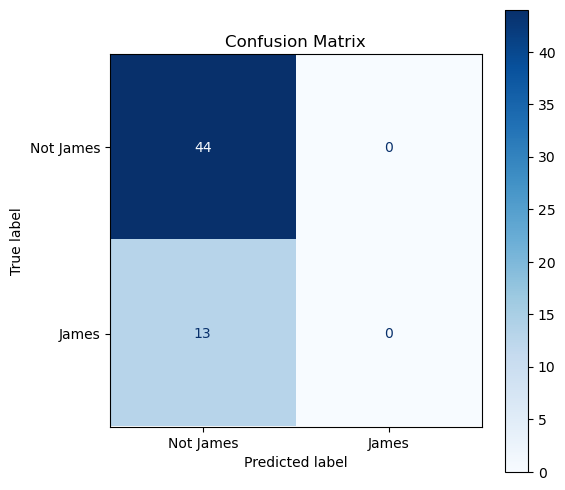

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Since MSE is not typical for classification, it's included here for educational purposes
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Mean Squared Error (MSE): {mse}")
print("Confusion Matrix:")
print(conf_matrix)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay(conf_matrix, display_labels=['Not James', 'James']).plot(values_format='d', cmap='Blues', ax=ax)
plt.title('Confusion Matrix')
plt.show()


**Figure 1**. _Confusion matrix for the classification model, with the threshold set at 0.5. As seen in this confusion matrix, the model does not classify any entry as positive (about James)._

From the last three metrics, we can easily determine that the model performs poorly with regards to the exploratory challenge of mapping songs to its true association with James. We detect that the poor performance of the model may stem from the threshold being too high. After all, in our original dataset, James is only 1 out of the 10 love interests that the data set consists off.

## New threshold (0.1)

Since there are 10 love interests and James is simply one of them, we adjust the threshold of acceptance as $\frac{1}{10}$ or 0.1, and calculate similar metrics. Due to time and spatial constraints, the report leaves this exercise to the reader to calculate by hand. The report would rather harness the power of technology in the 21st century and calculate these metrics using Python's `scikit-learn` library, shown below.

Accuracy with new threshold: 0.5964912280701754
Precision with new threshold: 0.25
Recall with new threshold: 0.38461538461538464
F1 score with new threshold: 0.30303030303030304
Confusion Matrix with New Threshold:
[[29 15]
 [ 8  5]]


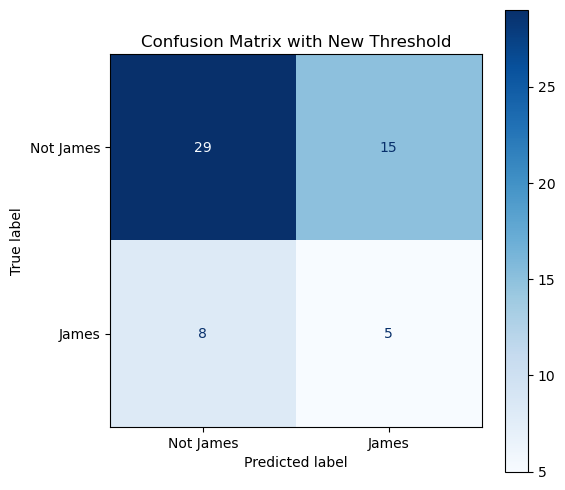

In [17]:
from sklearn.metrics import classification_report

# Step 1: Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Step 2: Choose a new threshold
new_threshold = 0.1  # Adjust this value based on your requirement

# Step 3: Apply the new threshold to determine class predictions
y_pred_new_threshold = (y_prob >= new_threshold).astype(int)

# Evaluate the model with the new predictions
accuracy_new = accuracy_score(y_test, y_pred_new_threshold)
precision_new = precision_score(y_test, y_pred_new_threshold)
recall_new = recall_score(y_test, y_pred_new_threshold)
f1_new = f1_score(y_test, y_pred_new_threshold)
conf_matrix_new = confusion_matrix(y_test, y_pred_new_threshold)

# Print the evaluation metrics with the new threshold
print(f"Accuracy with new threshold: {accuracy_new}")
print(f"Precision with new threshold: {precision_new}")
print(f"Recall with new threshold: {recall_new}")
print(f"F1 score with new threshold: {f1_new}")
print("Confusion Matrix with New Threshold:")
print(conf_matrix_new)

# Plotting the confusion matrix with the new threshold
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay(conf_matrix_new, display_labels=['Not James', 'James']).plot(values_format='d', cmap='Blues', ax=ax)
plt.title('Confusion Matrix with New Threshold')
plt.show()


**Figure 2**. _Confusion matrix for the classification model, with the threshold set at 0.1. We can notably see a better performance in terms of precision and accuracy._

With the threshold of classification being lower, we notice an improvement in model performance: while accuracy drops to 59.6%, we notice an increase of recall from 0 to 38.5%, and how precision and F1 score are now defined at 25% and 30.3%.

## What Model to Choose?

We continue to explore model performance across threshold by looking at the different model performance metrics in Figure 3 below.

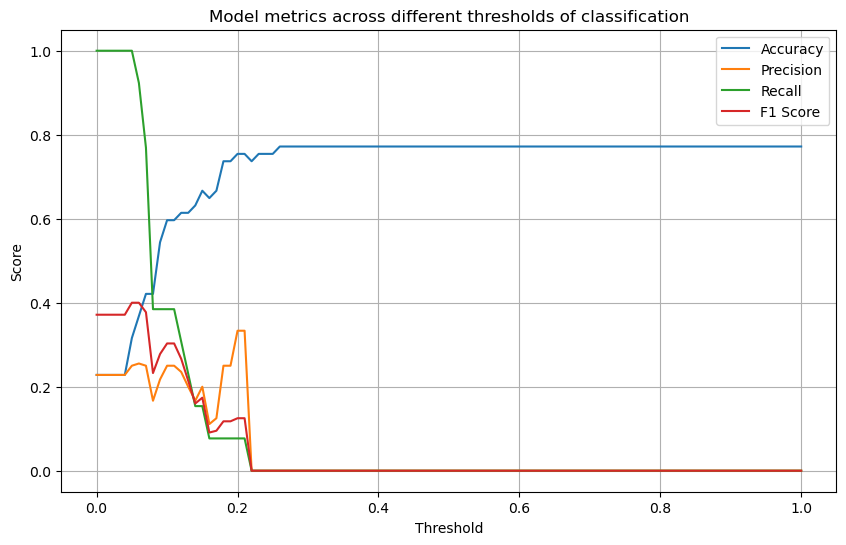

In [14]:
import matplotlib.pyplot as plt

thresholds = np.linspace(0, 1, 101)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_prob >= threshold).astype(int)
    accuracy_scores.append(accuracy_score(y_test, y_pred_threshold))
    precision_scores.append(precision_score(y_test, y_pred_threshold, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred_threshold))
    f1_scores.append(f1_score(y_test, y_pred_threshold, zero_division=0))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracy_scores, label='Accuracy')
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.title('Model metrics across different thresholds of classification')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

**Figure 3.** _Accuracy, precision, recall, and F1 score across different thresholds of classification._

So which threshold should we choose? We consider the predictive nature of our exploratory challenge: since we wish to ensure that as many of our predictions about James are as correct as possible, we would consider that recall takes precedence. From Figure 3, a good threshold to choose would be 0.2. At this threshold, the precision remains the highest, while accuracy remains high. Recall is low in this value, but this metric may not take precedence in this model.

# Conclusion & Future Directions

Given more time and intellectual resources, the model proposes that the report may venture further into multi-class classification using random forests or neural networks. In this light, we can have a new model that classifies any of the 10 love interests given a chosen song.

# AI Statement

The assignment heavily uses ChatGPT 4 to help with the code for Spotify API extracts as well as codes for generating the plot for model performance across different metrics.

# References
1. Nguyen, A. (n.d.). Generated Forum Code Workbook. Retrieved February 24, 2024, from https://sle-collaboration.minervaproject.com/?id=43f033e3-2cad-4d70-b3e0-57e4540a2721&userId=11968&name=An+%28he%2Fthey%29+Nguyen&avatar=https%3A//s3.us-east-1.amazonaws.com/picasso.fixtures/An_Nguyen_11968_2023-09-18T23%3A04%3A40.926Z&iframed=1&readOnly=0&isInstructor=0&enableSavingIndicators=1&signature=45ec8f413588b78bae461345c81941ba87300b0ba90a363d2a0160eff738ac76
2. OpenAI. (2024). ChatGPT [Large language model]. https://chat.openai.com/chat
3. ritvikmath (Director). (2021, March 8). Maximum Likelihood: Data Science Concepts. https://www.youtube.com/watch?v=VOIhswqFWVc
4. Spotify. (n.d.). Web API | Spotify for Developers. Retrieved February 24, 2024, from https://developer.spotify.com/documentation/web-api